<a href="https://colab.research.google.com/github/mesuttguven/ML4CS/blob/main/ML4CS_W4_Ensemble_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd
from tensorflow.keras.utils import get_file

In [ ]:
try:
    path = get_file('kddcup.data_10_percent.gz', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading')
    raise
    
print(path) 

2154496/2144903 [==============================] - 1s 0us/step
/root/.keras/datasets/kddcup.data_10_percent.gz


In [ ]:
df = pd.read_csv(path, dtype=str, encoding = "utf-8" ,header=None)


In [ ]:
# The CSV file has no column heads, so add them
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

In [ ]:
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]


In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [ ]:
# display 5 rows
df[0:5]
# a=np.array( df.values[:,4:5] );
# np.max(a)
# 693375640

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.


In [ ]:
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 494021 rows.
The number of data points are: 494021
The number of features are: 42
The different type of output labels are: {'teardrop.', 'phf.', 'land.', 'portsweep.', 'back.', 'smurf.', 'neptune.', 'rootkit.', 'warezclient.', 'satan.', 'buffer_overflow.', 'normal.', 'perl.', 'imap.', 'multihop.', 'pod.', 'ipsweep.', 'spy.', 'warezmaster.', 'guess_passwd.', 'loadmodule.', 'nmap.', 'ftp_write.'}
The number of different output labels are: 23


In [ ]:
# Data Cleaning

# Checking for NULL values
print('Null values in dataset are',len(df[df.isnull().any(1)]))
print('='*40)

Null values in dataset are 0


In [ ]:
# Checkng for DUPLICATE values
df.drop_duplicates(keep='first', inplace = True)

In [ ]:
# For now, just drop NA's (rows with missing values)
df.dropna(inplace=True,axis=1) 

In [ ]:
# stored the data into a pickle file so we can load through
# df.to_pickle('df.pkl')

print("Read {} rows.".format(len(df)))

Read 145586 rows.


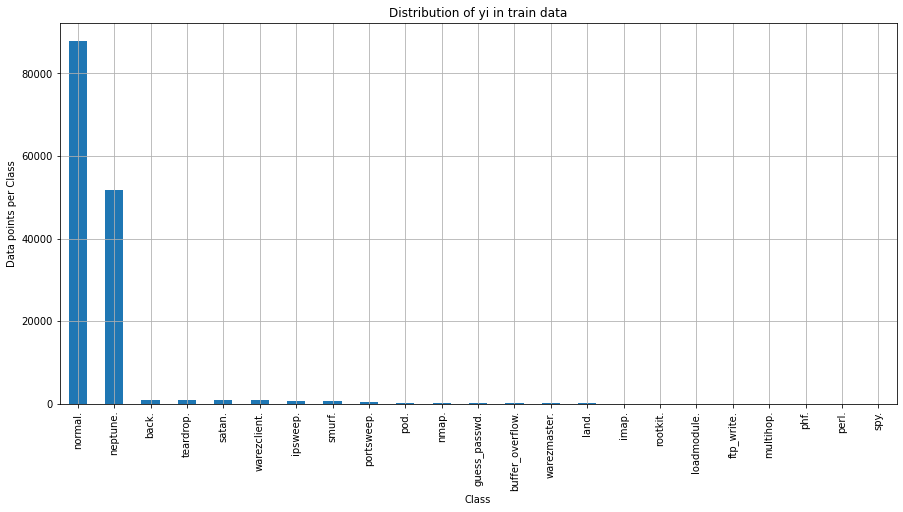

In [ ]:
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [ ]:
# Using only 34 features for classification
feature = df.drop(['protocol_type', 'service', 'flag','land','logged_in','is_host_login','is_guest_login','outcome'], axis=1)
target = df.values[:, 41:42]

In [ ]:
feature

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,181,5450,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00
1,0,239,486,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00
2,0,235,1337,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
3,0,219,1337,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
4,0,217,2032,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,310,1881,0,0,0,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.00,0.00,1.00,0.00,0.40,86,255,1.00,0.00,0.01,0.05,0.00,0.01,0.00,0.00
494017,0,282,2286,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,6,255,1.00,0.00,0.17,0.05,0.00,0.01,0.00,0.00
494018,0,203,1200,0,0,0,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.00,0.00,1.00,0.00,0.17,16,255,1.00,0.00,0.06,0.05,0.06,0.01,0.00,0.00
494019,0,291,1200,0,0,0,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.00,0.00,1.00,0.00,0.17,26,255,1.00,0.00,0.04,0.05,0.04,0.01,0.00,0.00


In [ ]:
target

array([['normal.'],
       ['normal.'],
       ['normal.'],
       ...,
       ['normal.'],
       ['normal.'],
       ['normal.']], dtype=object)

In [ ]:
# assign all attacks such as teardrop, imap, etc. to "abnormal"
for i in range(0, len(target)):
    if target[i] != 'normal.':
        target[i] = 'abnormal'

In [ ]:
# Check the numbers
print(np.count_nonzero(target == 'normal.'))
print(np.count_nonzero(target == 'abnormal'))
print(np.count_nonzero(target == 'normal.') + np.count_nonzero(target == 'abnormal'))

87832
57754
145586


In [ ]:
# Normalize data by using StandartScaler
# Convert Labels to numerical data with LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

sc = StandardScaler()
sc.fit(feature)
feature_std   = sc.transform(feature)
target_label = LabelEncoder().fit_transform(target.ravel())

In [ ]:
print(feature_std[0])
print(target_label[0])


[-0.10785024 -0.0042929   0.04259559 -0.08439386 -0.00473694 -0.07020952
 -0.01802181 -0.0079052  -0.01944033 -0.00861327 -0.01038985 -0.02069373
 -0.01827388 -0.05088331  0.         -0.66163548 -0.16304857 -0.643361
 -0.64279895 -0.35070778 -0.35106932  0.7717351  -0.33702098 -0.38470274
 -1.74038251 -1.05422372  0.97927166 -0.41755518  0.07122964 -0.31531007
 -0.64442834 -0.64170496 -0.36087737 -0.35394079]
1


In [ ]:
# Create a test/train split.  25% test
# Split into train/test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    feature, target_label, test_size=0.25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#log_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=3) 
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
estimators=[('knn', knn_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (knn_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.9982141385279006


knnClassifier 0.9974723191471825
RandomForestClassifier 0.9990109074923758
VotingClassifier 0.9982141385279006

SVC 0.6039234002802428


1.   List item
2.   List item

